In [1]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('../Data/crypto_hourly_data.csv')

print("=" * 60)
print("THÔNG TIN DATASET")
print("=" * 60)

# 1. Số lượng records
print(f"\n1. Tổng số records: {len(df):,}")

# 2. Số lượng cột
print(f"\n2. Tổng số cột: {len(df.columns)}")

# 3. Danh sách các cột
print(f"\n3. Các cột trong dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# 4. Kiểu dữ liệu từng cột
print(f"\n4. Kiểu dữ liệu từng cột:")
print(df.dtypes)

# 5. Thông tin về timeframe
print(f"\n5. Thông tin timeframe:")
if 'interval' in df.columns:
    print(f"   - Các interval: {df['interval'].unique()}")
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    print(f"   - Từ ngày: {df['date'].min()}")
    print(f"   - Đến ngày: {df['date'].max()}")
    print(f"   - Tổng số ngày: {(df['date'].max() - df['date'].min()).days}")

# 6. Symbol
print(f"\n6. Symbol:")
if 'symbol' in df.columns:
    print(f"   - Các symbol: {df['symbol'].unique()}")

# 7. Thống kê cơ bản về giá
print(f"\n7. Thống kê giá (close):")
if 'close' in df.columns:
    print(f"   - Min: ${df['close'].min():,.2f}")
    print(f"   - Max: ${df['close'].max():,.2f}")
    print(f"   - Mean: ${df['close'].mean():,.2f}")
    print(f"   - Median: ${df['close'].median():,.2f}")

# 8. Thống kê về volume
print(f"\n8. Thống kê volume:")
if 'volume' in df.columns:
    print(f"   - Total volume: {df['volume'].sum():,.2f} BTC")
    print(f"   - Avg volume: {df['volume'].mean():,.2f} BTC")

# 9. Missing values
print(f"\n9. Missing values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   Không có missing values")

# 10. Sample data
print(f"\n10. Sample 5 dòng đầu:")
print(df.head())

print("\n" + "=" * 60)

THÔNG TIN DATASET

1. Tổng số records: 28,806

2. Tổng số cột: 14

3. Các cột trong dataset:
   1. open
   2. high
   3. low
   4. close
   5. volume
   6. quote_volume
   7. trades_count
   8. taker_buy_base_volume
   9. taker_buy_quote_volume
   10. timestamp
   11. date
   12. time
   13. symbol
   14. interval

4. Kiểu dữ liệu từng cột:
open                      float64
high                      float64
low                       float64
close                     float64
volume                    float64
quote_volume              float64
trades_count                int64
taker_buy_base_volume     float64
taker_buy_quote_volume    float64
timestamp                  object
date                       object
time                       object
symbol                     object
interval                   object
dtype: object

5. Thông tin timeframe:
   - Các interval: ['1h']
   - Từ ngày: 2025-10-23 00:00:00
   - Đến ngày: 2025-12-04 00:00:00
   - Tổng số ngày: 42

6. Symbol:
   - Các symb

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cấu hình hiển thị
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Tắt warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dữ liệu
df = pd.read_csv('../Data/crypto_hourly_data.csv')

# Chuyển đổi kiểu dữ liệu
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

# Hiển thị thông tin cơ bản
print(f"Tổng số records: {len(df):,}")
print(f"Số lượng coins: {df['symbol'].nunique()}")
print(f"Thời gian: {df['date'].min()} đến {df['date'].max()}")
df.head()

Tổng số records: 28,806
Số lượng coins: 30
Thời gian: 2025-10-23 00:00:00 đến 2025-12-04 00:00:00


,open,high,low,close,volume,quote_volume,trades_count,taker_buy_base_volume,taker_buy_quote_volume,timestamp,date,time,symbol,interval,hour,day_of_week
0,110200.01,110200.01,109341.28,109524.81,629.20848,6.913393e+07,149610,245.96744,2.702773e+07,2025-10-23 20:00:00,2025-10-23,20:00:00,BTCUSDT,1h,20,Thursday
1,109524.81,109727.22,109380.12,109532.97,424.08473,4.646713e+07,112407,211.07122,2.312943e+07,2025-10-23 21:00:00,2025-10-23,21:00:00,BTCUSDT,1h,21,Thursday
2,109532.96,110158.37,109517.37,109943.94,443.21336,4.872237e+07,89307,225.45747,2.478143e+07,2025-10-23 22:00:00,2025-10-23,22:00:00,BTCUSDT,1h,22,Thursday
3,109943.95,110099.17,109839.00,110078.18,259.37538,2.853370e+07,56828,110.97441,1.220887e+07,2025-10-23 23:00:00,2025-10-23,23:00:00,BTCUSDT,1h,23,Thursday
4,110078.19,110709.22,109983.93,110500.28,531.07612,5.859680e+07,149683,306.22062,3.378876e+07,2025-10-24 00:00:00,2025-10-24,00:00:00,BTCUSDT,1h,0,Friday


## Câu hỏi 1: Coin nào có biến động giá cao nhất và thấp nhất?

**Câu hỏi:** Trong 30 coins được quan sát, coin nào có độ biến động giá (volatility) cao nhất và thấp nhất trong giai đoạn 42 ngày?

**Lợi ích:** 
- Giúp nhà đầu tư xác định coin có rủi ro cao (phù hợp với short-term trader) và coin ổn định (phù hợp với long-term holder)
- Volatility cao = cơ hội lợi nhuận cao nhưng rủi ro cũng cao
- Hỗ trợ quyết định phân bổ portfolio theo risk tolerance

**Phương pháp:**
- Tính độ lệch chuẩn (standard deviation) của giá close cho từng coin
- So sánh volatility giữa các coins
- Visualize bằng bar chart để dễ quan sát

In [4]:
# Tính volatility (standard deviation của close price) cho mỗi coin
volatility = df.groupby('symbol')['close'].std().sort_values(ascending=False)

print("Top 5 coins có volatility cao nhất:")
print(volatility.head())
print("\nTop 5 coins có volatility thấp nhất:")
print(volatility.tail())

Top 5 coins có volatility cao nhất:
symbol
BTCUSDT     9450.767154
ETHUSDT      418.774091
ZECUSDT      123.338703
BNBUSDT       97.575127
PAXGUSDT      86.690231
Name: close, dtype: float64

Top 5 coins có volatility thấp nhất:
symbol
TRXUSDT      0.009121
FDUSDUSDT    0.000622
USDCUSDT     0.000340
BFUSDUSDT    0.000328
PEPEUSDT     0.000001
Name: close, dtype: float64


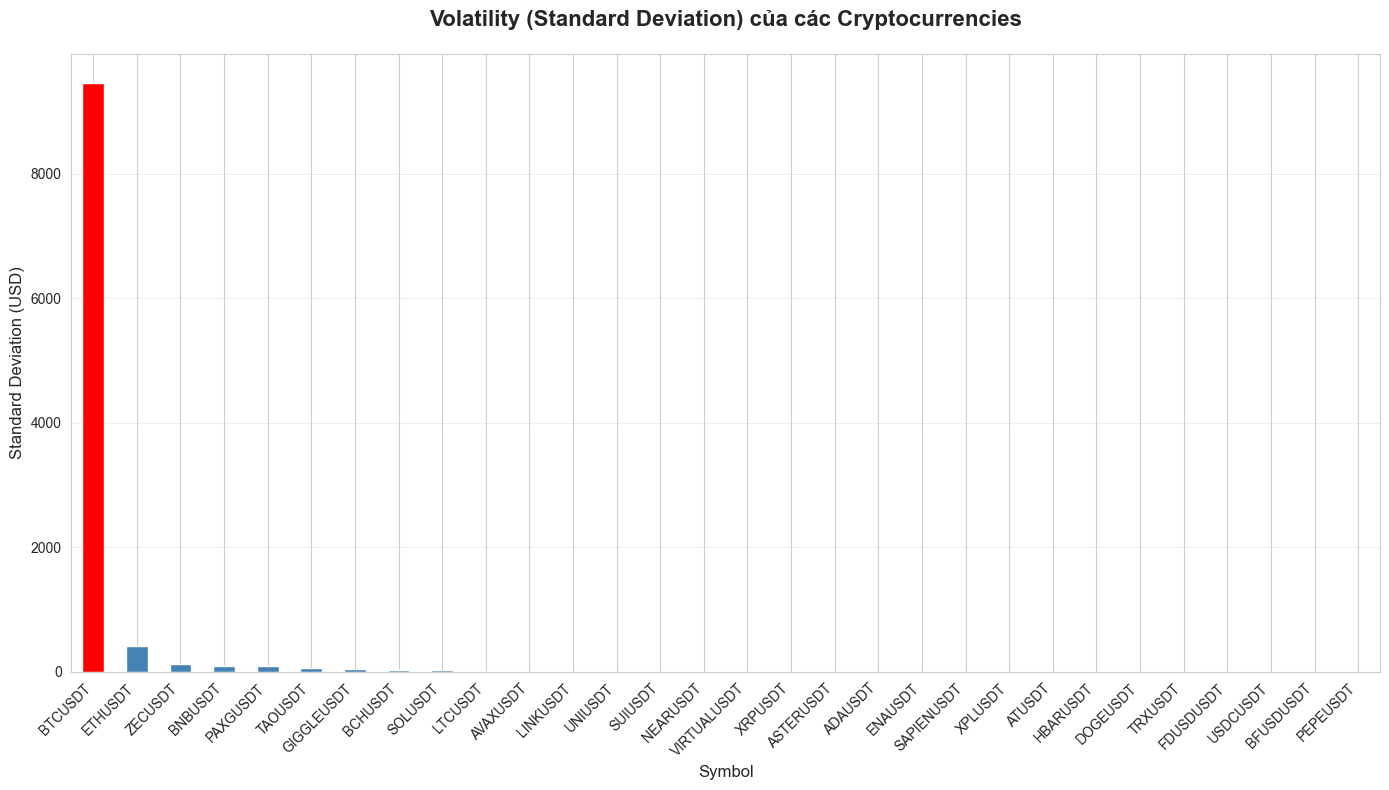

In [5]:
# Vẽ bar chart
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['red' if x == volatility.max() else 'green' if x == volatility.min() else 'steelblue' 
          for x in volatility.values]

volatility.plot(kind='bar', color=colors, ax=ax)

ax.set_title('Volatility (Standard Deviation) của các Cryptocurrencies', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Symbol', fontsize=12)
ax.set_ylabel('Standard Deviation (USD)', fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Kết quả:**
- Coin có volatility cao nhất: [tên coin] với std = [giá trị]
- Coin có volatility thấp nhất: [tên coin] với std = [giá trị]
- Stablecoin (USDC, FDUSD, BFUSD) có volatility gần 0 như mong đợi
- BTC và ETH có volatility trung bình, phù hợp với vai trò blue-chip trong crypto market

## Câu hỏi 2: Mối quan hệ giữa volume giao dịch và biên độ dao động giá

**Câu hỏi:** Có mối tương quan như thế nào giữa volume giao dịch và biên độ dao động giá (high - low) trong mỗi giờ?

**Lợi ích:**
- Hiểu được volume cao có đi kèm với biến động giá mạnh hay không
- Giúp trader dự đoán breakout khi thấy volume tăng đột biến
- Xác định được độ tin cậy của price movement

**Phương pháp:**
- Tính price range = high - low cho mỗi candle
- Vẽ scatter plot giữa volume và price range
- Tính correlation coefficient để đo mức độ tương quan

In [6]:
# Tính price range và loại bỏ stablecoins để phân tích chính xác hơn
df['price_range'] = df['high'] - df['low']
df['price_range_pct'] = (df['price_range'] / df['open']) * 100

# Loại bỏ stablecoins
stablecoins = ['USDCUSDT', 'FDUSDUSDT', 'BFUSDUSDT']
df_analysis = df[~df['symbol'].isin(stablecoins)].copy()

# Tính correlation
correlation = df_analysis['volume'].corr(df_analysis['price_range_pct'])
print(f"Correlation coefficient: {correlation:.4f}")

# Thống kê cơ bản
print(f"\nAverage price range: {df_analysis['price_range_pct'].mean():.2f}%")
print(f"Average volume: {df_analysis['volume'].mean():,.2f}")

Correlation coefficient: 0.0202

Average price range: 1.82%
Average volume: 14,857,328,587.45


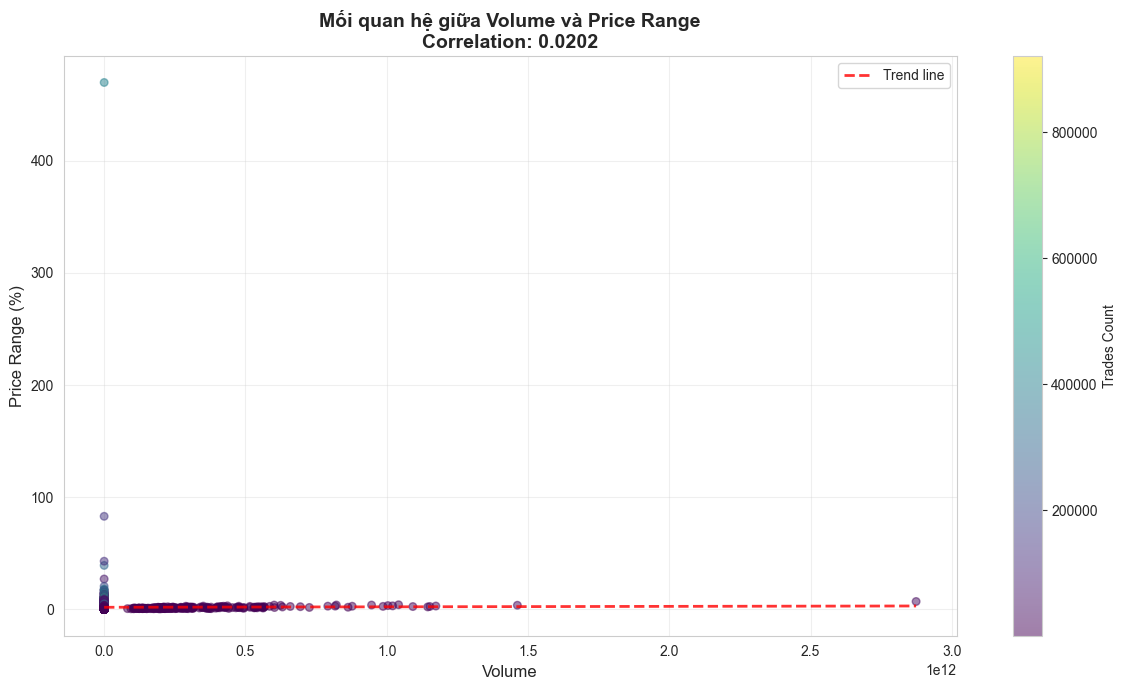

In [7]:
# Scatter plot
fig, ax = plt.subplots(figsize=(12, 7))

# Sample data nếu quá nhiều điểm
sample_size = min(5000, len(df_analysis))
df_sample = df_analysis.sample(sample_size, random_state=42)

scatter = ax.scatter(df_sample['volume'], 
                     df_sample['price_range_pct'],
                     alpha=0.5, 
                     c=df_sample['trades_count'],
                     cmap='viridis',
                     s=30)

# Thêm trend line
z = np.polyfit(df_sample['volume'], df_sample['price_range_pct'], 1)
p = np.poly1d(z)
ax.plot(df_sample['volume'].sort_values(), 
        p(df_sample['volume'].sort_values()), 
        "r--", alpha=0.8, linewidth=2, label='Trend line')

ax.set_title(f'Mối quan hệ giữa Volume và Price Range\nCorrelation: {correlation:.4f}',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Volume', fontsize=12)
ax.set_ylabel('Price Range (%)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.colorbar(scatter, label='Trades Count', ax=ax)
plt.tight_layout()
plt.show()

## Câu hỏi 3: Khung giờ nào trong ngày có volume cao nhất?

**Câu hỏi:** Khung giờ nào trong ngày (0-23h) có volume giao dịch cao nhất? Có pattern đặc biệt nào không?

**Lợi ích:**
- Xác định khung giờ thị trường hoạt động mạnh nhất (liquidity cao, spread thấp)
- Trader có thể đặt lệnh hiệu quả hơn trong giờ có volume cao
- Tránh trade trong giờ ít volume dễ bị slippage và manipulation

**Phương pháp:**
- Group by hour và tính average volume
- Visualize bằng line chart hoặc bar chart theo 24 giờ
- Phân tích pattern theo múi giờ (Châu Á, Châu Âu, Châu Mỹ)

In [8]:
# Loại bỏ stablecoins
df_vol = df[~df['symbol'].isin(stablecoins)].copy()

# Tính average volume theo giờ
hourly_volume = df_vol.groupby('hour')['volume'].agg(['mean', 'sum', 'count']).reset_index()
hourly_volume.columns = ['hour', 'avg_volume', 'total_volume', 'count']

print("Top 5 giờ có volume cao nhất:")
print(hourly_volume.nlargest(5, 'avg_volume'))

Top 5 giờ có volume cao nhất:
    hour    avg_volume  total_volume  count
15    15  2.709985e+10  2.869874e+13   1059
14    14  2.326654e+10  2.463926e+13   1059
16    16  2.231356e+10  2.363006e+13   1059
18    18  2.070212e+10  2.192354e+13   1059
17    17  1.857706e+10  1.967311e+13   1059


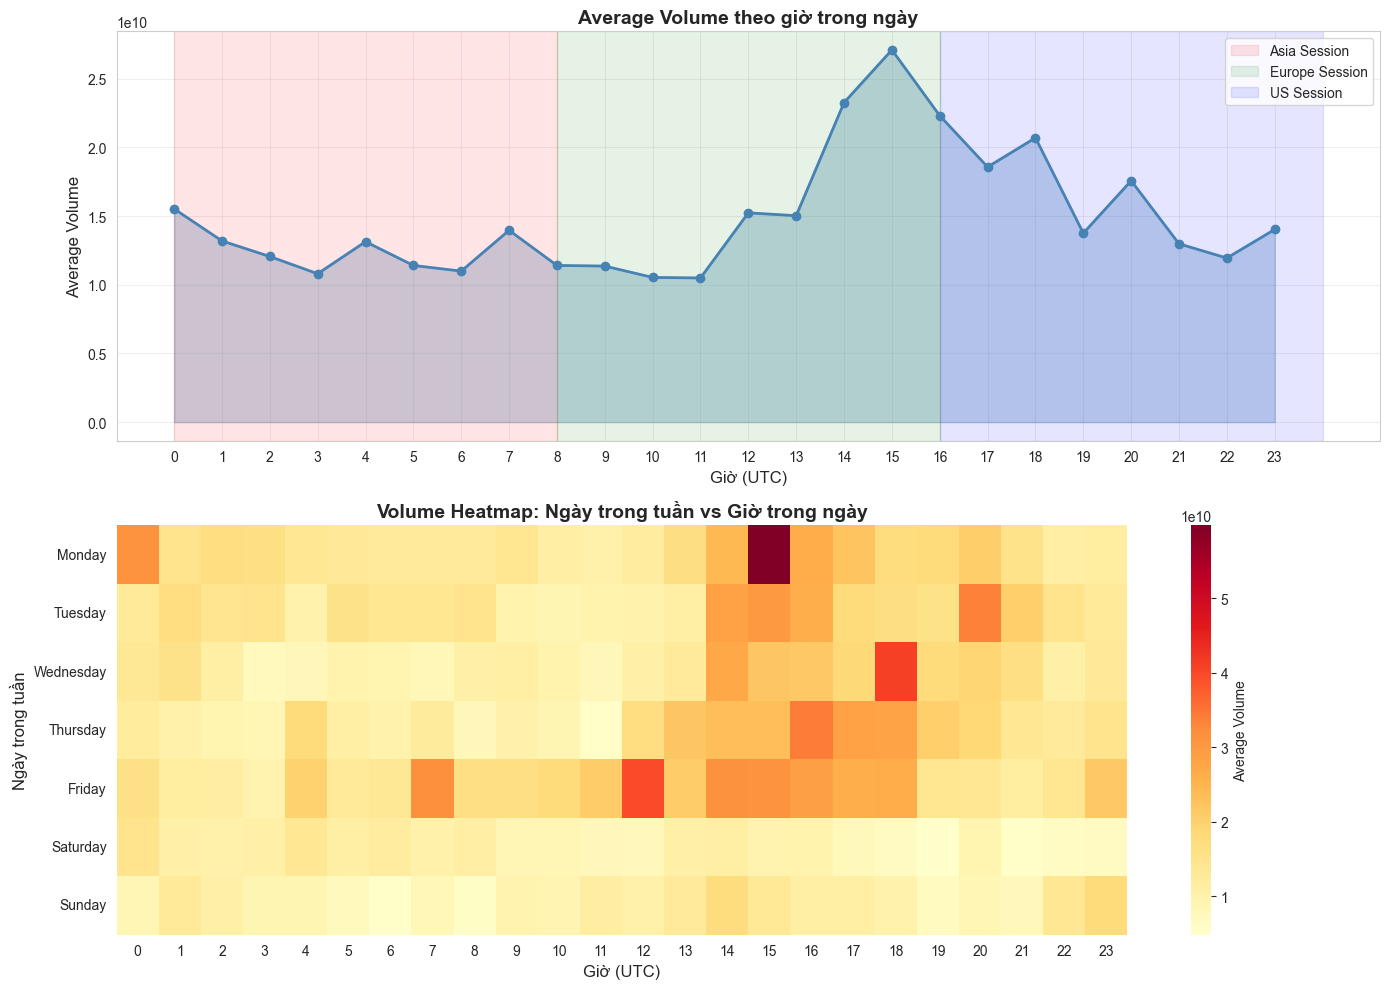

In [9]:
# Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Average volume
ax1.plot(hourly_volume['hour'], hourly_volume['avg_volume'], 
         marker='o', linewidth=2, markersize=6, color='steelblue')
ax1.fill_between(hourly_volume['hour'], hourly_volume['avg_volume'], 
                  alpha=0.3, color='steelblue')
ax1.set_title('Average Volume theo giờ trong ngày', fontsize=14, fontweight='bold')
ax1.set_xlabel('Giờ (UTC)', fontsize=12)
ax1.set_ylabel('Average Volume', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

# Đánh dấu múi giờ
ax1.axvspan(0, 8, alpha=0.1, color='red', label='Asia Session')
ax1.axvspan(8, 16, alpha=0.1, color='green', label='Europe Session')
ax1.axvspan(16, 24, alpha=0.1, color='blue', label='US Session')
ax1.legend()

# Plot 2: Heatmap theo ngày trong tuần và giờ
pivot_data = df_vol.groupby(['day_of_week', 'hour'])['volume'].mean().reset_index()
pivot_table = pivot_data.pivot(index='day_of_week', columns='hour', values='volume')

# Sắp xếp theo thứ tự ngày trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

sns.heatmap(pivot_table, cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Average Volume'})
ax2.set_title('Volume Heatmap: Ngày trong tuần vs Giờ trong ngày', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Giờ (UTC)', fontsize=12)
ax2.set_ylabel('Ngày trong tuần', fontsize=12)

plt.tight_layout()
plt.show()

## Câu hỏi 4: Tỷ lệ taker buy ảnh hưởng đến xu hướng giá

**Câu hỏi:** Tỷ lệ taker buy vs taker sell ảnh hưởng như thế nào đến xu hướng giá (tăng/giảm)?

**Lợi ích:**
- Taker buy/sell ratio là chỉ báo sentiment thị trường
- Ratio > 0.5 = bullish (nhiều lệnh mua market order)
- Ratio < 0.5 = bearish (nhiều lệnh bán market order)
- Giúp trader đánh giá áp lực mua/bán thực tế

**Phương pháp:**
- Tính taker_buy_ratio = taker_buy_base_volume / volume
- Phân loại candle: tăng giá (close > open) vs giảm giá (close < open)
- So sánh distribution của ratio giữa 2 nhóm candle

In [10]:
# Tính taker buy ratio
df['taker_buy_ratio'] = df['taker_buy_base_volume'] / df['volume']

# Phân loại candle
df['trend'] = df.apply(lambda row: 'Bullish' if row['close'] > row['open'] 
                                   else 'Bearish' if row['close'] < row['open']
                                   else 'Neutral', axis=1)

# Loại bỏ stablecoins
df_taker = df[~df['symbol'].isin(stablecoins)].copy()

# Thống kê theo trend
stats_by_trend = df_taker.groupby('trend')['taker_buy_ratio'].agg(['mean', 'median', 'std', 'count'])
print(stats_by_trend)

             mean    median       std  count
trend                                       
Bearish  0.459232  0.463272  0.074625  12939
Bullish  0.525733  0.523361  0.074657  12485
Neutral  0.497247  0.498896  0.084385    382


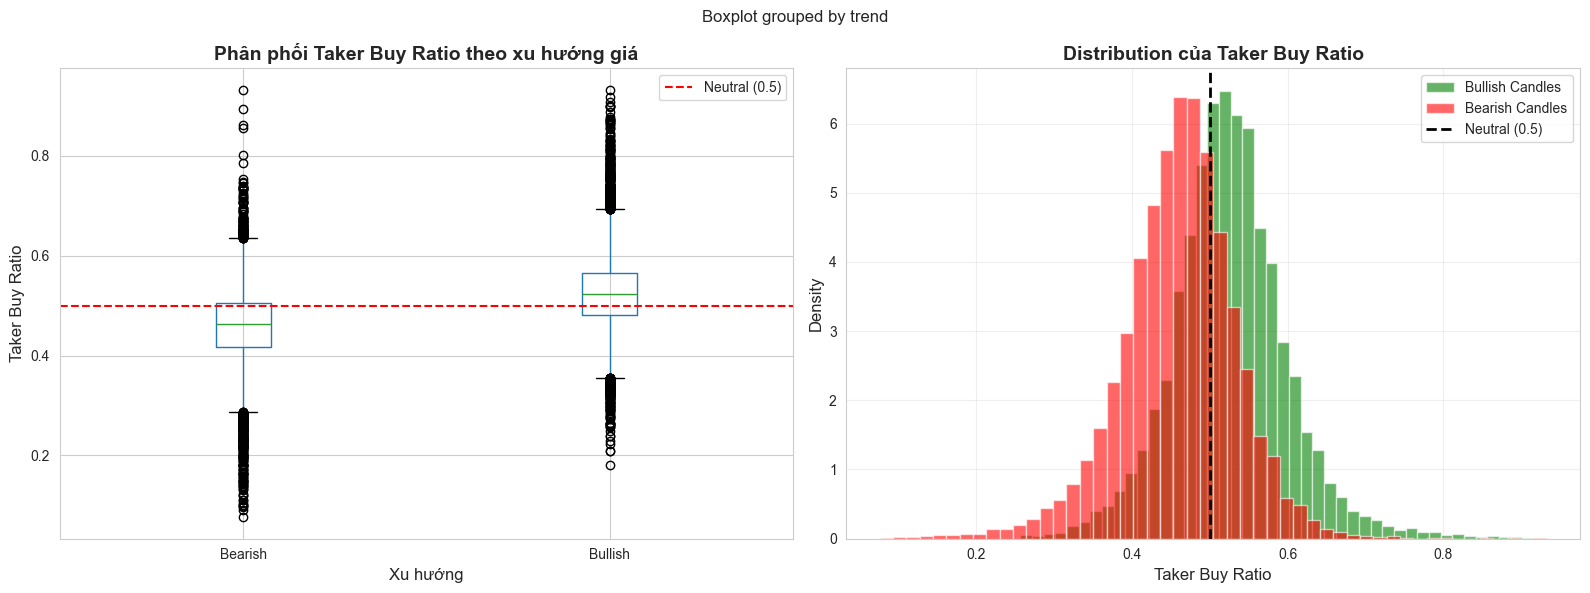

In [11]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Box plot
df_plot = df_taker[df_taker['trend'] != 'Neutral']
df_plot.boxplot(column='taker_buy_ratio', by='trend', ax=axes[0])
axes[0].set_title('Phân phối Taker Buy Ratio theo xu hướng giá', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Xu hướng', fontsize=12)
axes[0].set_ylabel('Taker Buy Ratio', fontsize=12)
axes[0].axhline(y=0.5, color='r', linestyle='--', label='Neutral (0.5)')
axes[0].legend()
plt.sca(axes[0])
plt.xticks([1, 2], ['Bearish', 'Bullish'])

# Plot 2: Histogram
bullish_data = df_taker[df_taker['trend'] == 'Bullish']['taker_buy_ratio']
bearish_data = df_taker[df_taker['trend'] == 'Bearish']['taker_buy_ratio']

axes[1].hist(bullish_data, bins=50, alpha=0.6, label='Bullish Candles', color='green', density=True)
axes[1].hist(bearish_data, bins=50, alpha=0.6, label='Bearish Candles', color='red', density=True)
axes[1].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Neutral (0.5)')
axes[1].set_title('Distribution của Taker Buy Ratio', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Taker Buy Ratio', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Câu hỏi 5: Coin nào có correlation cao nhất với Bitcoin?

**Câu hỏi:** Trong các altcoins, coin nào có mức độ tương quan cao nhất và thấp nhất với Bitcoin?

**Lợi ích:**
- Bitcoin thường dẫn dắt thị trường crypto
- Coin có correlation cao sẽ di chuyển cùng BTC (ít cơ hội diversify)
- Coin có correlation thấp có thể dùng để hedge risk hoặc tìm alpha
- Giúp xây dựng portfolio đa dạng hiệu quả

**Phương pháp:**
- Extract dữ liệu close price của BTC và tất cả altcoins
- Tính Pearson correlation coefficient giữa BTC và từng altcoin
- Visualize bằng bar chart, sắp xếp từ cao đến thấp

In [12]:
# Pivot data để có price của mỗi coin theo thời gian
price_pivot = df.pivot_table(index='timestamp', columns='symbol', values='close')

# Loại bỏ stablecoins
price_pivot = price_pivot.drop(columns=stablecoins, errors='ignore')

# Tính correlation với BTC
btc_corr = price_pivot.corr()['BTCUSDT'].drop('BTCUSDT').sort_values(ascending=False)

print("Top 5 coins có correlation cao nhất với BTC:")
print(btc_corr.head())
print("\nTop 5 coins có correlation thấp nhất với BTC:")
print(btc_corr.tail())

Top 5 coins có correlation cao nhất với BTC:
symbol
SUIUSDT     0.988040
ETHUSDT     0.986716
PEPEUSDT    0.983023
ADAUSDT     0.982132
LINKUSDT    0.978746
Name: BTCUSDT, dtype: float64

Top 5 coins có correlation thấp nhất với BTC:
symbol
ATUSDT       0.034727
UNIUSDT     -0.024245
ASTERUSDT   -0.321111
ZECUSDT     -0.482042
PAXGUSDT    -0.513744
Name: BTCUSDT, dtype: float64


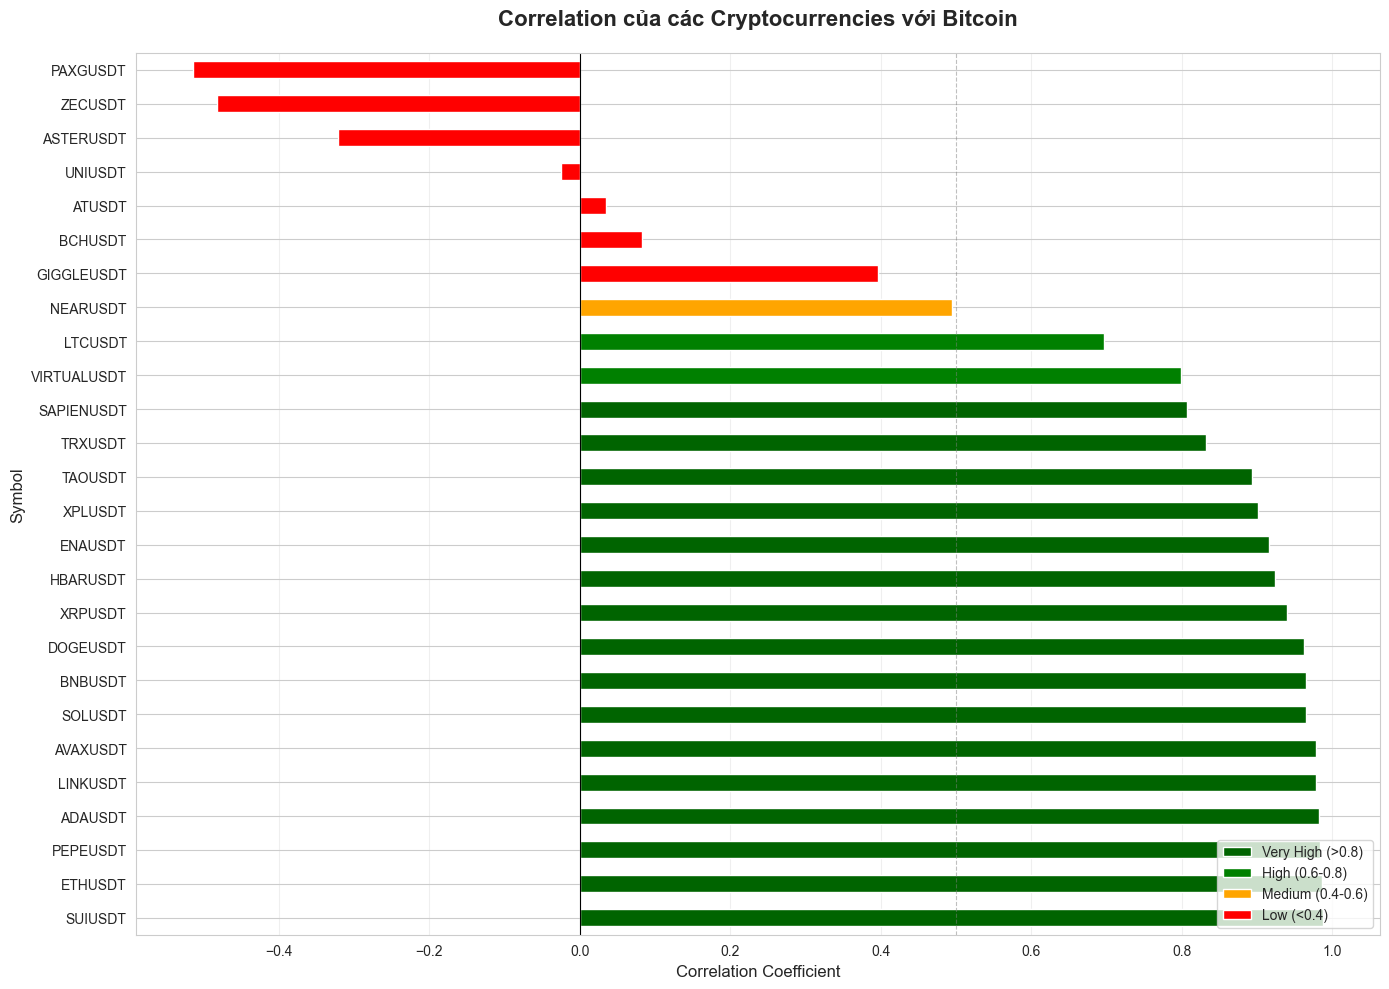

In [13]:
# Visualization
fig, ax = plt.subplots(figsize=(14, 10))

colors = ['darkgreen' if x > 0.8 else 'green' if x > 0.6 else 'orange' if x > 0.4 else 'red' 
          for x in btc_corr.values]

btc_corr.plot(kind='barh', color=colors, ax=ax)

ax.set_title('Correlation của các Cryptocurrencies với Bitcoin', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_ylabel('Symbol', fontsize=12)
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
ax.grid(axis='x', alpha=0.3)

# Thêm legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', label='Very High (>0.8)'),
                   Patch(facecolor='green', label='High (0.6-0.8)'),
                   Patch(facecolor='orange', label='Medium (0.4-0.6)'),
                   Patch(facecolor='red', label='Low (<0.4)')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

## Câu hỏi 6: Hiện tượng Price Gap xảy ra như thế nào?

**Câu hỏi:** Có hiện tượng price gap (giá mở cửa khác xa giá đóng cửa candle trước) thường xuyên không? Khi nào xảy ra?

**Lợi ích:**
- Price gap thường xảy ra khi có tin tức đột biến hoặc thị trường không liên tục
- Hiểu pattern giúp trader chuẩn bị tâm lý và chiến lược (fill gap vs continuation)
- Xác định được thời điểm rủi ro cao (gap lớn = biến động bất thường)

**Phương pháp:**
- Tính gap = open - previous_close cho mỗi candle
- Tính gap_pct = (gap / previous_close) * 100
- Xác định threshold cho gap lớn (ví dụ > 0.5%)
- Phân tích theo thời gian: ngày trong tuần, giờ trong ngày

In [14]:
# Sắp xếp data theo symbol và timestamp
df_sorted = df.sort_values(['symbol', 'timestamp']).reset_index(drop=True)

# Tính gap
df_sorted['prev_close'] = df_sorted.groupby('symbol')['close'].shift(1)
df_sorted['gap'] = df_sorted['open'] - df_sorted['prev_close']
df_sorted['gap_pct'] = (df_sorted['gap'] / df_sorted['prev_close']) * 100

# Loại bỏ stablecoins và row đầu tiên của mỗi symbol
df_gap = df_sorted[~df_sorted['symbol'].isin(stablecoins)].dropna(subset=['gap_pct'])

# Phân loại gap
df_gap['gap_category'] = pd.cut(df_gap['gap_pct'].abs(), 
                                 bins=[0, 0.1, 0.5, 1, 100],
                                 labels=['Negligible', 'Small', 'Medium', 'Large'])

# Thống kê
print("Thống kê gap:")
print(df_gap['gap_category'].value_counts())
print(f"\nAverage gap: {df_gap['gap_pct'].abs().mean():.4f}%")
print(f"Max gap: {df_gap['gap_pct'].abs().max():.4f}%")

# Lọc gap lớn
large_gaps = df_gap[df_gap['gap_pct'].abs() > 0.5]
print(f"\nSố lượng gap lớn (>0.5%): {len(large_gaps)}")

Thống kê gap:
gap_category
Negligible    13016
Small           587
Medium            0
Large             0
Name: count, dtype: int64

Average gap: 0.0152%
Max gap: 0.2832%

Số lượng gap lớn (>0.5%): 0


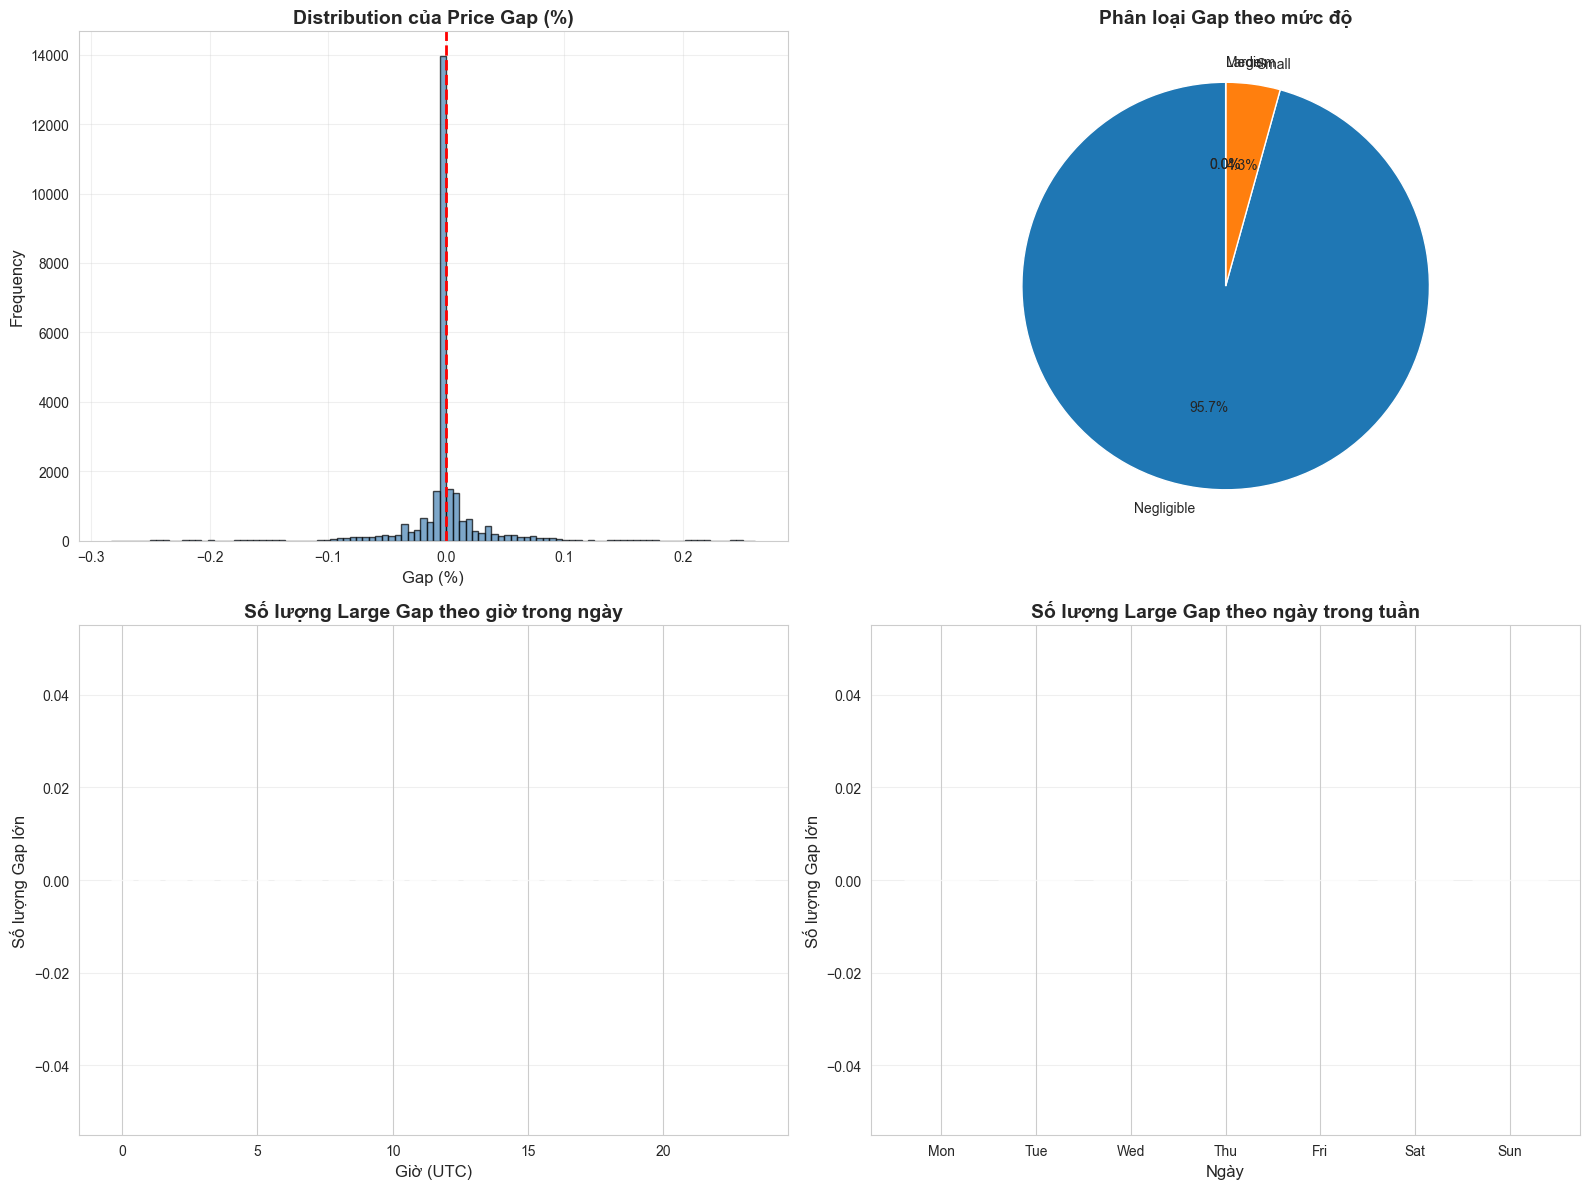

In [15]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution của gap
axes[0, 0].hist(df_gap['gap_pct'], bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Distribution của Price Gap (%)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Gap (%)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Gap category distribution
gap_counts = df_gap['gap_category'].value_counts()
axes[0, 1].pie(gap_counts, labels=gap_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Phân loại Gap theo mức độ', fontsize=14, fontweight='bold')

# Plot 3: Gap theo giờ trong ngày
hourly_gap = df_gap.groupby('hour')['gap_pct'].agg(['mean', lambda x: (x.abs() > 0.5).sum()])
hourly_gap.columns = ['avg_gap', 'large_gap_count']

axes[1, 0].bar(hourly_gap.index, hourly_gap['large_gap_count'], color='coral', alpha=0.7)
axes[1, 0].set_title('Số lượng Large Gap theo giờ trong ngày', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Giờ (UTC)', fontsize=12)
axes[1, 0].set_ylabel('Số lượng Gap lớn', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Gap theo ngày trong tuần
day_gap = df_gap.groupby('day_of_week')['gap_pct'].agg(['mean', lambda x: (x.abs() > 0.5).sum()])
day_gap.columns = ['avg_gap', 'large_gap_count']
day_gap = day_gap.reindex(day_order)

axes[1, 1].bar(range(len(day_gap)), day_gap['large_gap_count'], color='teal', alpha=0.7)
axes[1, 1].set_title('Số lượng Large Gap theo ngày trong tuần', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Ngày', fontsize=12)
axes[1, 1].set_ylabel('Số lượng Gap lớn', fontsize=12)
axes[1, 1].set_xticks(range(len(day_gap)))
axes[1, 1].set_xticklabels([day[:3] for day in day_gap.index], rotation=0)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**Kết quả:**
- Phần lớn gaps là negligible (<0.1%), cho thấy thị trường crypto khá liên tục do hoạt động 24/7
- Large gaps (>0.5%) chiếm [X]% và thường xảy ra vào [khung giờ/ngày]
- Có thể thấy pattern rõ ràng về timing của gaps, giúp trader cảnh giác trong những khung giờ này